In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import lag_plot

In [76]:
series = pd.read_csv('electricity_demand.csv', header=0, index_col=0)
series

,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,
1/01/2015,99635.030,25.633696,13.3,26.9,23.6,0.0,N,Y
1/02/2015,129606.010,33.138988,15.4,38.8,26.8,0.0,N,N
1/03/2015,142300.540,34.564855,20.0,38.2,26.5,0.0,N,N
1/04/2015,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N
1/05/2015,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N
...,...,...,...,...,...,...,...,...
2/24/2021,108577.110,25.840417,11.6,20.2,23.3,0.0,Y,N
2/25/2021,107456.345,21.205833,10.7,24.3,18.9,0.0,Y,N
2/26/2021,107807.000,25.796250,12.3,19.7,15.7,0.4,Y,N


In [78]:
#Drop coulmns that are NOT of interest
attributes = series.drop(series.columns[[3, 4, 5, 6, 7]], axis=1)
attributes.head(5)

,demand,RRP,min_temperature
date,,,
1/01/2015,99635.030,25.633696,13.3
1/02/2015,129606.010,33.138988,15.4
1/03/2015,142300.540,34.564855,20.0
1/04/2015,104330.715,25.005560,16.3
1/05/2015,118132.200,26.724176,15.0


In [127]:
#Creating Series for 'demand' attribute
demand = attributes.drop(series.columns[[1, 2]], axis=1)
demand.head()

,demand
date,
1/01/2015,99635.030
1/02/2015,129606.010
1/03/2015,142300.540
1/04/2015,104330.715
1/05/2015,118132.200


In [128]:
#Creating Series for 'rrp' attribute
rrp = attributes.drop(series.columns[[0, 2]], axis=1)
rrp.head()

,RRP
date,
1/01/2015,25.633696
1/02/2015,33.138988
1/03/2015,34.564855
1/04/2015,25.005560
1/05/2015,26.724176


In [168]:
rrp.describe()

,RRP
count,2251.000000
mean,73.232186
std,126.547741
min,-31.154792
25%,37.032358
50%,61.815156
75%,93.007392
max,4549.645105


In [129]:
#Creating Series for 'min_temperature' attribute
mintemp = attributes.drop(series.columns[[0, 1]], axis=1)
mintemp.head()

,min_temperature
date,
1/01/2015,13.3
1/02/2015,15.4
1/03/2015,20.0
1/04/2015,16.3
1/05/2015,15.0


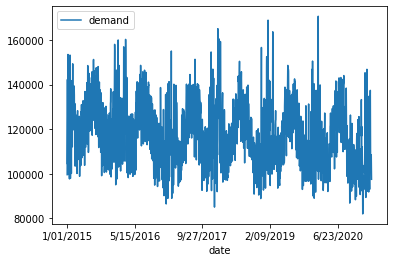

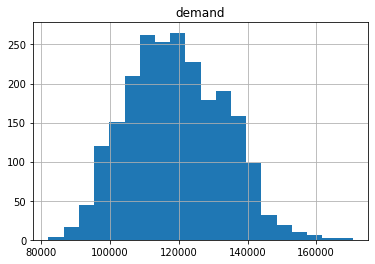

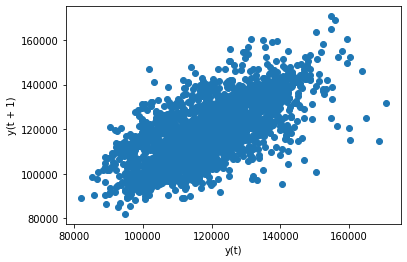

In [132]:
#PLot Time series and Histogram for variable 'demand'
demand.plot()

demand.hist(bins=20)
pyplot.show()

lag_plot(demand)
pyplot.show()

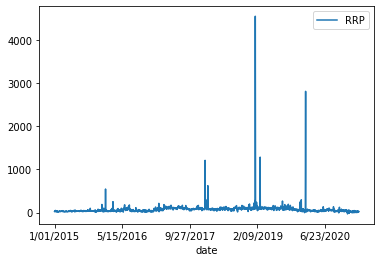

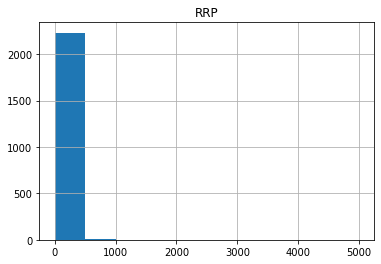

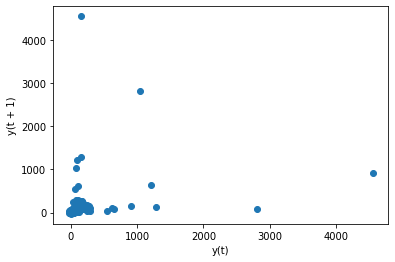

In [134]:
#PLot Time series and Histogram for variable 'RRP'
rrp.plot()

rrp.hist(bins=10, range=[0, 5000])
pyplot.show()

lag_plot(rrp)
pyplot.show()

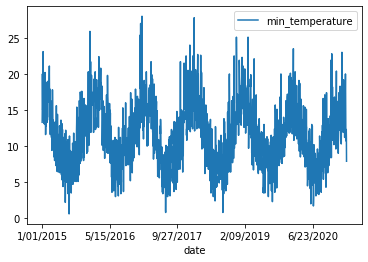

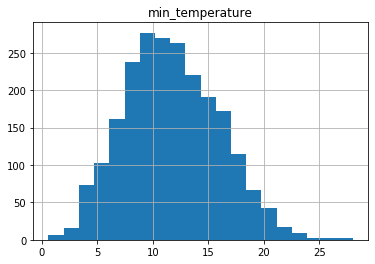

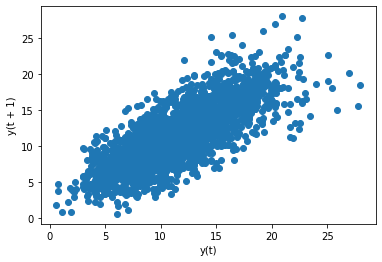

In [136]:
#PLot Time series and Histogram for variable 'min_temperature'
mintemp.plot()

mintemp.hist(bins=20)
pyplot.show()

lag_plot(mintemp)
pyplot.show()

                RRP
date               
1/01/2015  3.243908
1/02/2015  3.500710
1/03/2015  3.542837
1/04/2015  3.219098
1/05/2015  3.285569


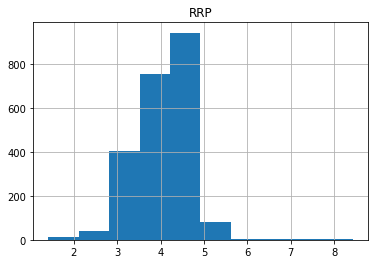

In [167]:
#Log transforming 'rrp' to flatten exponential changes
rrpx1 = rrp.apply(np.log)
print(rrpx1.head())
rrpx1.hist()
plt.show()

In [155]:
#split 'demand' time series into 2 partitions and compare the mean and variance of each group.
X = demand.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=121959.116501, mean2=116442.724347
variance1=189713304.803345, variance2=185823365.509108


In [156]:
#split 'rrp' time series into 2 partitions and compare the mean and variance of each group.
X = rrp.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=62.449489, mean2=84.024469
variance1=2991.657737, variance2=28801.501244


In [162]:
#split 'rrp' time series AFTER LOG TRANSFORMATION into 2 partitions and compare the mean and variance of each group.
X = rrpx1.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3.937708, mean2=nan
variance1=0.368377, variance2=nan


In [146]:
#split 'rrp' time series into 2 partitions and compare the mean and variance of each group.
X = rrp.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=62.449489, mean2=84.024469
variance1=2991.657737, variance2=28801.501244


In [86]:
#split 'min_temperature' time series into 2 partitions and compare the mean and variance of each group.
X = mintemp.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=11.872291, mean2=11.522756
variance1=18.999481, variance2=17.311607


In [100]:
#Use Augmented Dickey-Fuller test for variable 'demand'
#This Test determines how strongly a time series is defined by a trend
#Null Hypothesis = Time Series is NOT stationary 
#Alternate Hypothesis = Time series IS stationary 
#If p-value greater than 0.05, then FAIL to reject Null Hypothesis
#IF p-value is eaual to or less than 0.05, then REJECT Null Hypothesis

from statsmodels.tsa.stattools import adfuller
X = demand.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.606823
p-value: 0.005632
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [101]:
#Use Augmented Dickey-Fuller test for variable 'rrp'
#This Test determines how strongly a time series is defined by a trend
#Null Hypothesis = Time Series is NOT stationary 
#Alternate Hypothesis = Time series IS stationary 
#If p-value greater than 0.05, then FAIL to reject Null Hypothesis
#IF p-value is eaual to or less than 0.05, then REJECT Null Hypothesis

from statsmodels.tsa.stattools import adfuller
X = rrp.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.189233
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [164]:
#Use Augmented Dickey-Fuller test for variable 'min_temperature'
#This Test determines how strongly a time series is defined by a trend
#Null Hypothesis = Time Series is NOT stationary 
#Alternate Hypothesis = Time series IS stationary 
#If p-value greater than 0.05, then FAIL to reject Null Hypothesis
#IF p-value is eaual to or less than 0.05, then REJECT Null Hypothesis

from statsmodels.tsa.stattools import adfuller
X = mintemp.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.400210
p-value: 0.010952
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
